# Two Samples t-test

Often we want to examine if the mean from one sample is the same as the mean from another. A rejection of this hypothesis is sufficient evidence to suggest the two samples may in fact come from two different populations. 

This notebook contains some simple examples on how to conduct two sample t-test using [scipy](https://scipy.org/). 

## Independent Sample 

We will first consider the simple case where the two samples are independent and have equal variance. 

Consider the hypothesis
$$H_0: \mu_1-\mu_2 = 0$$
$$H_1: \mu_1 - \mu_2 \neq 0$$

In order to use scipy test this, we first need to import the relevant modules. 

In [5]:
#import the usual modules
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

Similar to the one sample case, we will explore the properties of the two-sample t-test via simulations. That is, we simulate two sets of data and test the equality of the means between the two samples. Since we know the data generating process, we know the truth and thus, we can examine the performance of the two samples t-test. 

In [7]:
N=30 #set the number of observations
mu = 3 #set the mean of the population
sigma = 2 #set the standard deviation of the population 
samples = sps.norm.rvs(size=(2,N),loc=mu,scale=sigma)
samples = pd.DataFrame(samples.transpose(), columns=['G1', 'G2'])

array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>]], dtype=object)

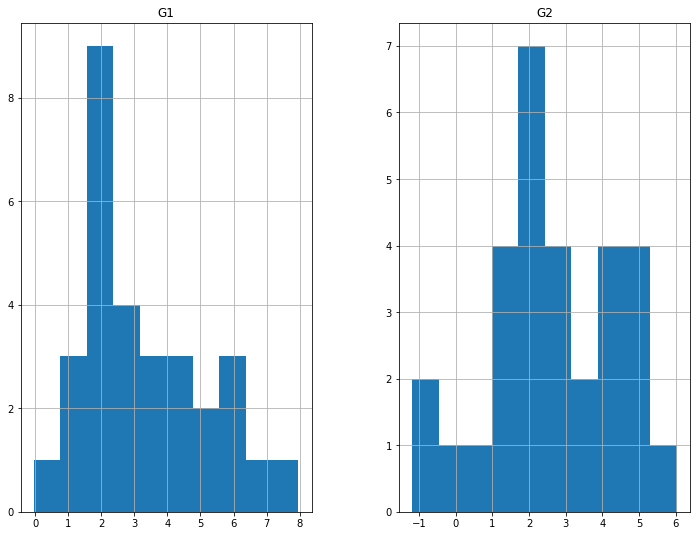

In [8]:
samples.hist()

In [10]:
sample_means = samples.mean()
sample_variances = samples.var(ddof=1)
print('The sample means are {0:.4f} and {1:.4f}'.format(*sample_means))
print('The sample variances are {0:.4f} and {1:.4f}'.format(*sample_variances))

The sample means are 3.2527 and 2.6485
The sample variances are 3.7632 and 3.1563


In [11]:
alpha = 0.05 #set the significance of the test. 
#calculate the t-statistics
ttest = (sample_means[0]-sample_means[1])/np.power(2*(np.mean(sample_variances))/N, 0.5) 
cv = sps.t.isf([1-alpha/2,alpha/2], df=2*(N-1))
pvalue = 2*(1-sps.t.cdf(abs(ttest),df=2*(N-1)))
print('The t-statistics is {0:.4f} with critival values {1:.4f} and {2:.4f}. P-value is {3:.4f}'.format(ttest,*cv,pvalue))

The t-statistics is 1.2581 with critival values -2.0017 and 2.0017. P-value is 0.2134


Exercise
========
Can you replicate the results above using the scipy.stats.ttest_ind() function? 


In [15]:
G1, G2 = samples.iloc[:,0].values, samples.iloc[:,1].values
sps.ttest_ind(samples.iloc[:,0].values, samples.iloc[:,1].values)

Ttest_indResult(statistic=1.2580909367955657, pvalue=0.21340020975062918)

Now let's see how this test work when the samples are in fact drawn from two different distributions. 

In [17]:
diff = 3
mu2 = mu + diff #creating new mean 
samples['G3'] = sps.norm.rvs(size=N, loc=mu2, scale=sigma) # create new column

array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>]],
      dtype=object)

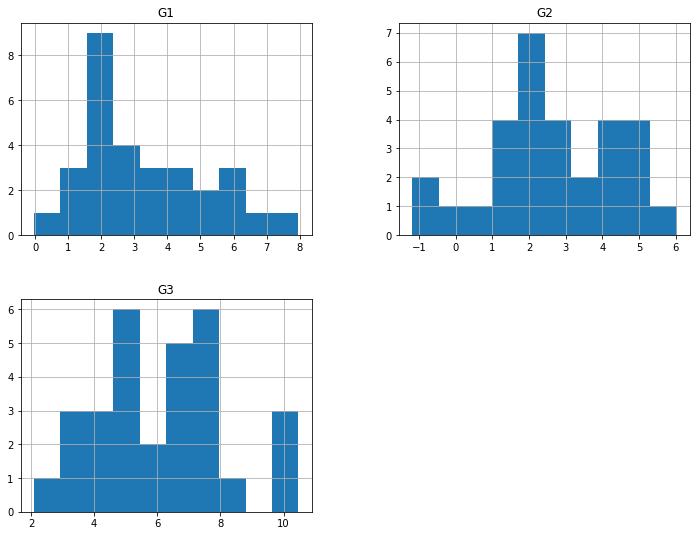

In [18]:
samples.hist()

In [20]:
G3 = samples.iloc[:,2].values
results_diff02 = sps.ttest_ind(G1, G2) #testing first sample against third.
results_diff12 = sps.ttest_ind(G1, G3) #testing second sample against third.
print(results_diff02)
print(results_diff12)

Ttest_indResult(statistic=1.2580909367955657, pvalue=0.21340020975062918)
Ttest_indResult(statistic=-5.464812051151601, pvalue=1.0196581516795945e-06)


The results above suggest that we don't have evidence to reject the null of equal mean between G1 and G2 but strong evidence to reject the null between G1 and G3. 

## Correlated Samples

**Exercise** Look up the function [ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) and examine how you may repeat the analysis above assuming the two samples are correlated. 

You may explore how to use the function based on the simulated data generated using the code below. The code generates a pandas dataframe called *sample_dep* with two columns of data that are correlated. The correlation is controlled by the parameter *corr*.  

The difference in mean between the two random variables can be controlled by *mu*. If $\mu=0$ then there is no difference in mean between the two random variables in the data generating process. 

In [39]:
N = 30
mu = 2
corr = 0.5
init = sps.norm.rvs(size=(2,N), scale=1, loc=0)
y = corr*init[0] + init[1] + mu
temp = np.c_[init[0],y]
sample_dep = pd.DataFrame(temp, columns=['x', 'y'])